In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('housingData.csv',sep=",") #sep表示以什么分割，
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
data[:25]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data = data.apply(pd.to_numeric, errors='coerce')

In [8]:
print("房价最大值:",data['MEDV'].max())
print("房价最低值:",data['MEDV'].min())
print("房价平均值:",data['MEDV'].mean())

房价最大值: 50.0
房价最低值: 5.0
房价平均值: 22.532806324110677


In [9]:
from matplotlib import pyplot as plt

cor_data = data[:].corr()
cor_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


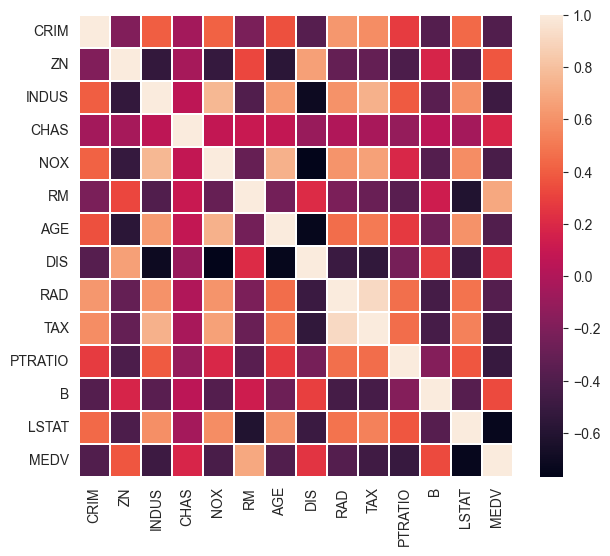

In [10]:
import seaborn as sns 

plt.subplots(figsize = (7,6)) #c创建子图并设定长和宽大小
ax = sns.heatmap(cor_data, linewidth=0.2) #传入相关系数cor_data，设置线条大小为0.2
plt.show()

In [11]:
x = data.drop(columns=['MEDV'])
y = data[['MEDV']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler  #数据标准化模块

st= StandardScaler()   #实例化

X_train= st.fit_transform(X_train)  
X_test = st.fit_transform(X_test)


X_train

array([[-0.36652131, -0.48121504, -0.44820847, ...,  1.18880212,
         0.43987709, -0.65723105],
       [-0.41939349,  0.57053684, -0.89005025, ...,  0.58247746,
         0.231398  ,  0.19241603],
       [ 0.69470041, -0.48121504,  1.01383275, ...,  0.81567925,
         0.43987709,  1.12730279],
       ...,
       [ 0.23859022, -0.48121504,  1.01383275, ...,  0.81567925,
         0.43987709,  0.87020893],
       [-0.40107032, -0.48121504, -0.73298357, ..., -0.49025077,
         0.21666488, -0.29702468],
       [-0.42996331, -0.48121504, -0.76821348, ...,  0.34927567,
         0.43987709, -0.58711455]])

In [14]:
# 处理缺失值：使用列均值填充NaN
import numpy as np
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))  # 用每列的均值填充NaN
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))    # 同样对X_test进行处理
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))         # 对y_train进行处理
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))            # 对y_test进行处理

In [15]:
from sklearn.linear_model import LinearRegression  #线性模型导入线性回归
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import numpy as np
model = LinearRegression() #实例化模型
model.fit(X_train, y_train) #采用fit方法，拟合回归系数和截距
y_pred = model.predict(X_test)#模型预测

print('截距：',model.intercept_[0])   #输出截距
print('回归系数：',model.coef_[0])   #输出系数   
print('R^2: {}'.format(model.score(X_test, y_test)))# 使用score函数计算r^2值
print("R2=",r2_score(y_test, y_pred))#使用r2_score计算模型评价,r^2决定系数值。两者效果一样。
print('平均绝对误差：',metrics.mean_absolute_error(y_test,y_pred)) #MAE
print('均方误差：',metrics.mean_squared_error(y_test,y_pred))  #MSE
print('均方根误差：',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))  #EMSE,开平方

截距： 22.33983050847458
回归系数： [-9.83182859e-01  1.39705677e+00  1.54956122e-03  7.65731351e-01
 -2.42586119e+00  2.15522568e+00 -4.79611175e-01 -3.55112254e+00
  2.46055454e+00 -1.68012168e+00 -2.11536188e+00  5.57460190e-01
 -3.61150624e+00]
R^2: 0.7650493714091045
R2= 0.7650493714091045
平均绝对误差： 3.392470543404575
均方误差： 21.534279357744165
均方根误差： 4.64050421374059


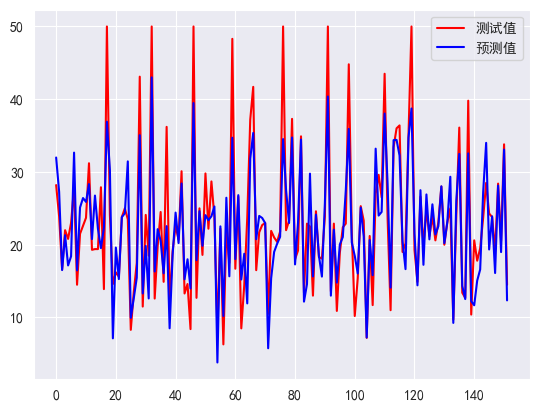

In [16]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体，支持中文
# 画图：y_test 为测试值，y_pred 为预测值
plt.plot(y_test, c="r", label="测试值")
plt.plot(y_pred, c="b", label="预测值")

# 添加图例
plt.legend()

# 显示图像
plt.show()

In [17]:
!pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
